# Multiple LR

- y = b0 + b1x1 + b2x2 + b3x3 + ..... + bnxn - multiple linear regression equation, when in dataset there are more than 1 independent variable i.e., feature

# Assumptions of linear regression

- linearity
- homoscedaticity
- multivariate normality
- Independence
- lack of multicollinearity
- the outlier check

# 5 methods of building a model

- All-in
- Backward-elimination
- forward selection
- bidirectional elimination
- score comparision

2,3,4 are stepwise regression

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv(r"your_datafile_path")
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [23]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [13]:
#data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
#split dataset for training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
#train the multiple linear regression model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
comparison=pd.DataFrame(y_pred,y_test)

In [19]:
print(comparison)

                       0
103282.38  103015.201598
144259.40  132582.277608
146121.95  132447.738452
77798.83    71976.098513
191050.39  178537.482211
105008.31  116161.242302
81229.06    67851.692097
97483.56    98791.733747
110352.25  113969.435330
166187.94  167921.065696


In [26]:
#to predict the future value:
print(regressor.predict([[0,1,0,145628.32,98752.23,548796.2356]]))

[177572.48302917]


Text(0.5, 1.0, 'Marketing spend / state')

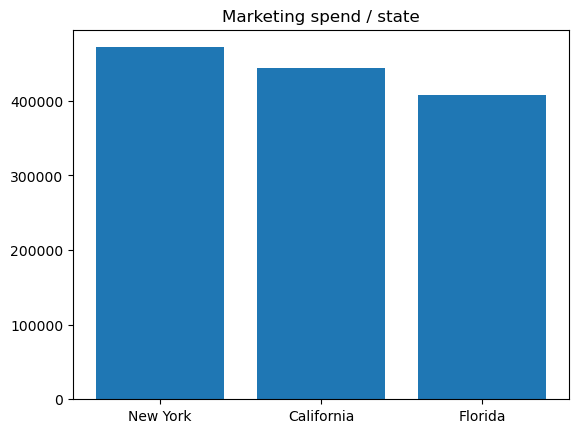

In [36]:
#query: in which state marketing production required less

plt.bar(dataset['State'],dataset['Marketing Spend'])
plt.title('Marketing spend / state')